Loading dataset... (This might take 30 seconds)


C:\Users\feba thankam moni\AppData\Local\Temp\ipykernel_11856\1905677489.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('energy_data.txt', sep=';', parse_dates={'dt':['Date', 'Time']},
C:\Users\feba thankam moni\AppData\Local\Temp\ipykernel_11856\1905677489.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('energy_data.txt', sep=';', parse_dates={'dt':['Date', 'Time']},
C:\Users\feba thankam moni\AppData\Local\Temp\ipykernel_11856\1905677489.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warnin

Dataset Loaded Successfully!


C:\Users\feba thankam moni\AppData\Local\Temp\ipykernel_11856\1905677489.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


Data Cleaned and Resampled to Hourly.


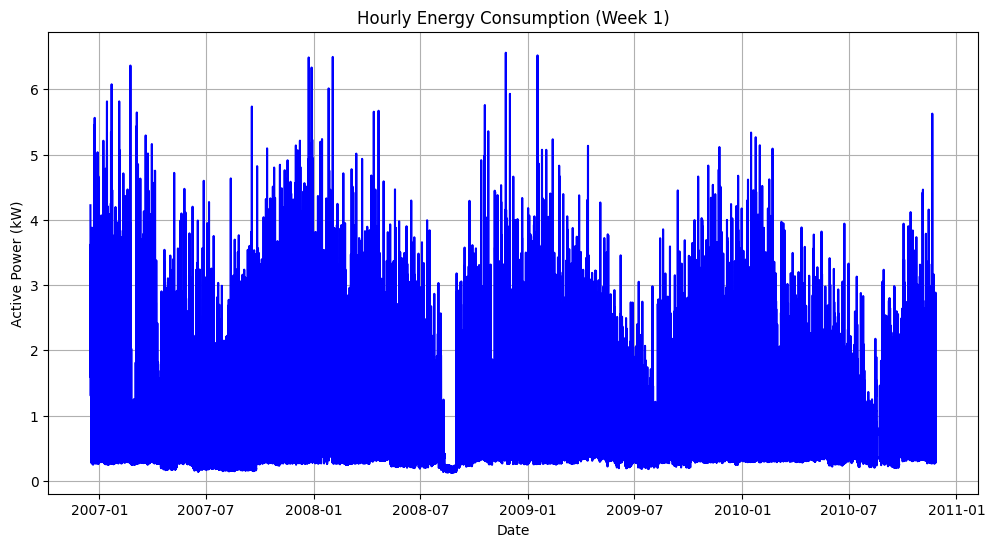

SUCCESS: Week 1 Complete!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
print("Loading dataset... (This might take 30 seconds)")

# Since you corrected the name, we look for 'energy_data.txt'
try:
    df = pd.read_csv('energy_data.txt', sep=';', parse_dates={'dt':['Date', 'Time']}, 
                     infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
except FileNotFoundError:
    # Just in case it is still named with .txt.txt
    df = pd.read_csv('energy_data.txt.txt', sep=';', parse_dates={'dt':['Date', 'Time']}, 
                     infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

print("Dataset Loaded Successfully!")

# 2. Clean and Resample (Hourly)
# Set time as the index
df = df.set_index('dt')
# Drop empty rows
df = df.dropna()
# Ensure numbers are treated as numbers (floats)
df = df.astype(float)
# Resample to Hourly averages
df_hourly = df.resample('H').mean()
print("Data Cleaned and Resampled to Hourly.")

# 3. Plot the Graph for Week 1
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], color='blue')
plt.title('Hourly Energy Consumption (Week 1)')
plt.xlabel('Date')
plt.ylabel('Active Power (kW)')
plt.grid(True)
plt.show()

# 4. Save the result for later
df_hourly.to_csv('processed_hourly_data.csv')
print("SUCCESS: Week 1 Complete!")